<a href="https://colab.research.google.com/github/LeToyek/2141720085-pcvk-2023/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

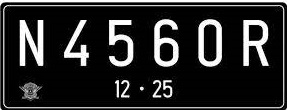

In [4]:
ori = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(ori)

In [5]:
def dilasi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if image[i, j] == 255:
                result[i-1:i+2, j] = 255
                result[i, j-1:j+2] = 255

    return result

In [6]:
def showCompImage(img1,img2,title):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title(f"Original Image")
  plt.imshow(img1,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 2, 2)
  plt.title(f"{title}")
  plt.imshow(img2,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.show()

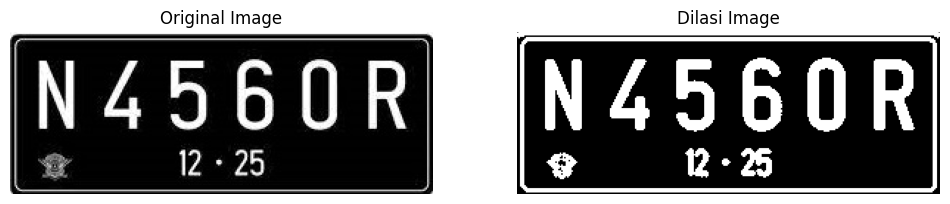

In [7]:
plat = "/content/drive/MyDrive/PCVK/plat_nomer.jpg"
# Baca citra
image = cv2.imread(plat, cv2.IMREAD_GRAYSCALE)

# Threshold citra (misalnya, menggunakan binary threshold)
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Lakukan dilasi
dilated_image = dilasi(image)

# Tampilkan hasil dilasi
showCompImage(ori,dilated_image,"Dilasi Image")

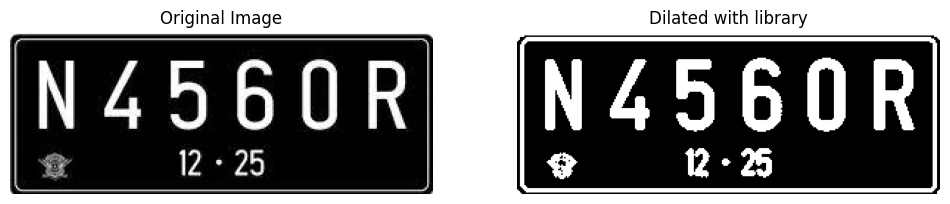

In [8]:
# Threshold citra (misalnya, menggunakan binary threshold)
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)

# Buat SED (Structuring Element) berbentuk cross 3x3
cross_SED = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Lakukan operasi dilasi
dilated_image = cv2.dilate(image, cross_SED)

showCompImage(ori,dilated_image,"Dilated with library")

In [9]:
def erosi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    # Ukuran SE square 5x5
    se_size = 5

    for i in range(se_size // 2, height - se_size // 2):
        for j in range(se_size // 2, width - se_size // 2):
            if np.all(image[i - se_size // 2:i + se_size // 2 + 1, j - se_size // 2:j + se_size // 2 + 1] == 255):
                result[i, j] = 255

    return result

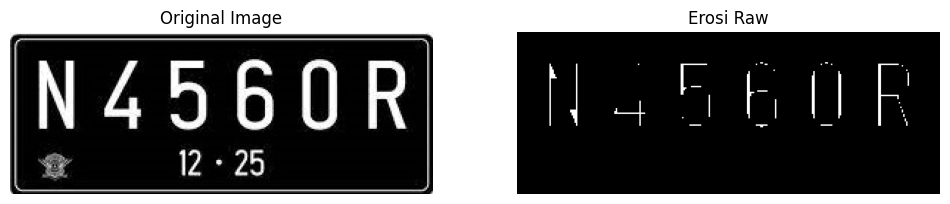

In [10]:
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)

# Lakukan erosi
eroted_image = erosi(image)

showCompImage(ori,eroted_image,"Erosi Raw")

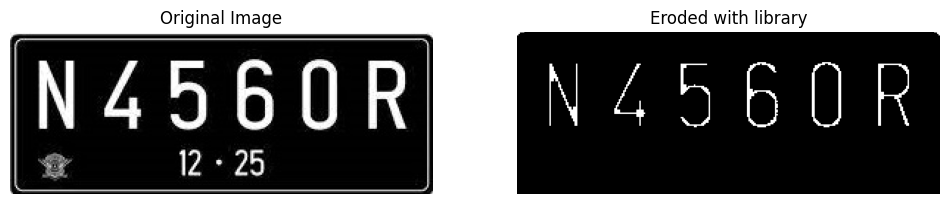

In [11]:
cross_SED = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Lakukan operasi erosi
dilated_image = cv2.erode(image, cross_SED)

showCompImage(ori,dilated_image,"Eroded with library")

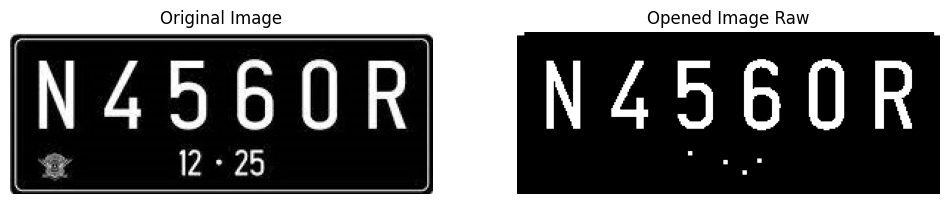

In [12]:
def erosi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if np.all(image[i-1:i+2, j-1:j+2] == 255):
                result[i, j] = 255

    return result

def dilasi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if image[i, j] == 255:
                result[i-1:i+2, j-1:j+2] = 255

    return result


# Threshold citra (misalnya, menggunakan binary threshold)
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)

# Lakukan erosi
eroded_image = erosi(image)

# Lakukan dilasi pada hasil erosi
opened_image = dilasi(eroded_image)

showCompImage(ori,opened_image,"Opened Image Raw")


In [13]:
def compare3(img1,img2,img3,title3):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.title(f"Original Image")
  plt.imshow(img1,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 3, 2)
  plt.title(f"Binary Image")
  plt.imshow(img2,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 3, 3)
  plt.title(f"{title3}")
  plt.imshow(img3,cmap="gray")
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.show()

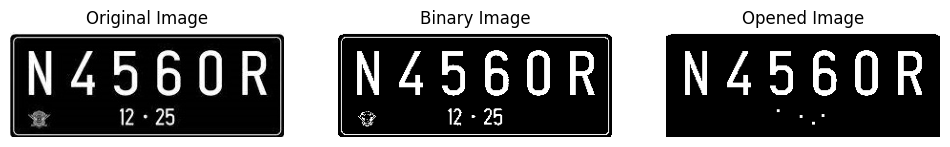

In [14]:
square_SED = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Lakukan operasi erosi
eroded_image = cv2.erode(image, square_SED)

# Lakukan operasi dilasi pada hasil erosi
opened_image = cv2.dilate(eroded_image, square_SED)

compare3(ori,image,opened_image,"Opened Image")

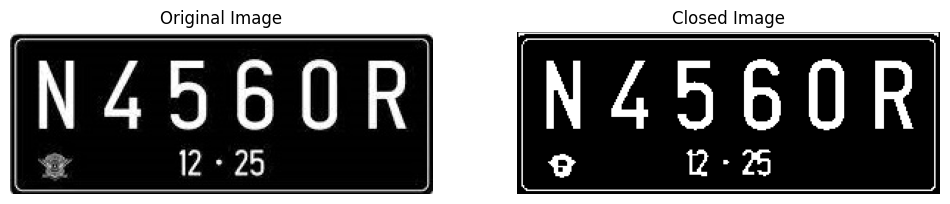

In [15]:
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)

dilated_image = dilasi(image)

# Lakukan dilasi pada hasil erosi
closed_image = erosi(dilated_image)

showCompImage(ori,closed_image,"Closed Image")


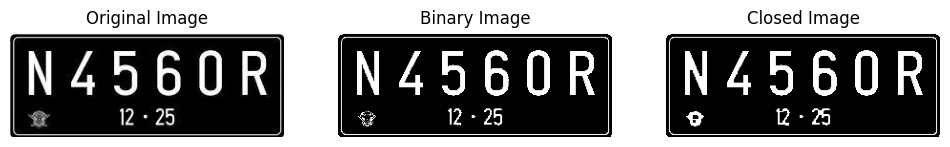

In [16]:
_, image = cv2.threshold(ori, 127, 255, cv2.THRESH_BINARY)


dilated_image = cv2.dilate(image,square_SED)
# Lakukan dilasi pada hasil erosi
closed_image = cv2.erode(dilated_image,square_SED)

compare3(ori,image,closed_image,"Closed Image")

In [17]:
# Buat SED (Structuring Element) berbentuk Cross 3x3
cross_SED_3x3 = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]], dtype=np.uint8)

# Buat SED (Structuring Element) berbentuk Cross 5x5
cross_SED_5x5 = np.array([[0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0],
                          [1, 1, 1, 1, 1],
                          [0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0]], dtype=np.uint8)


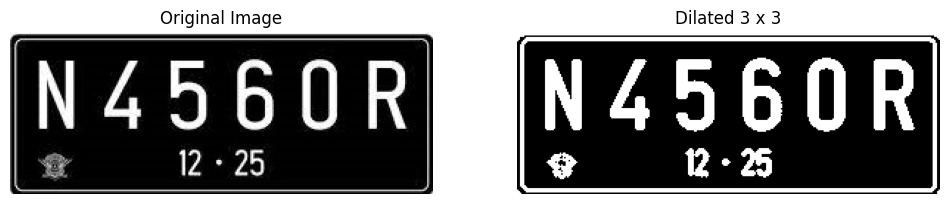

In [18]:
# square_SED = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_image = cv2.dilate(image,cross_SED_3x3)

showCompImage(ori,dilated_image,"Dilated 3 x 3")

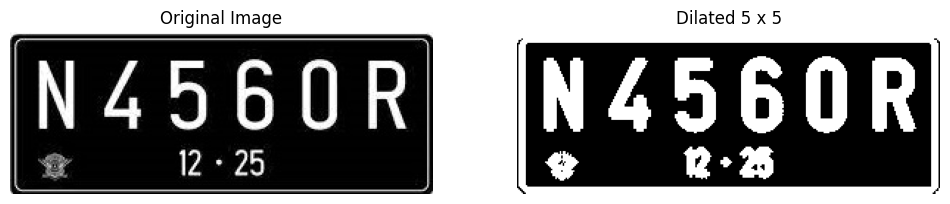

In [19]:
# square_SED = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated_image = cv2.dilate(image,cross_SED_5x5)

showCompImage(ori,dilated_image,"Dilated 5 x 5")

In [20]:
# Buat SED (Structuring Element) berbentuk Circular 3x3
circle_SED_3x3 = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]], dtype=np.uint8)

# Buat SED (Structuring Element) berbentuk Circular 5x5
circle_SED_5x5 = np.array([[0, 0, 1, 0, 0],
                          [0, 1, 1, 1, 0],
                          [1, 1, 1, 1, 1],
                          [0, 1, 1, 1, 0],
                          [0, 0, 1, 0, 0]], dtype=np.uint8)

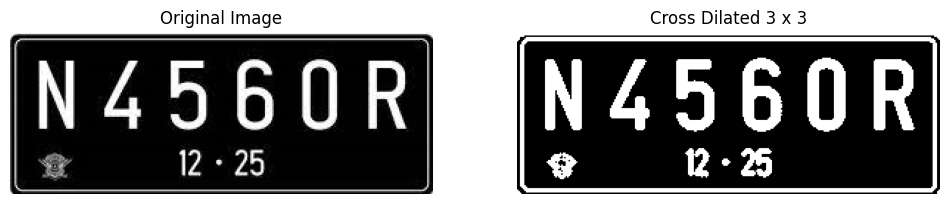

In [21]:
# Lakukan operasi dilasi dengan SED Circular 3x3
dilated_image_3x3 = cv2.dilate(image, circle_SED_3x3)

showCompImage(ori,dilated_image_3x3,"Cross Dilated 3 x 3")

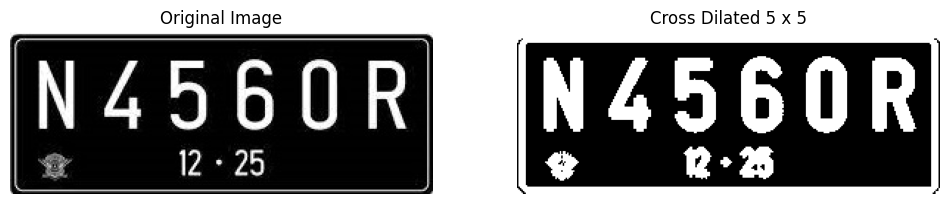

In [22]:
# Lakukan operasi dilasi dengan SED Circular 3x3
dilated_image_5x5 = cv2.dilate(image, circle_SED_5x5)

showCompImage(ori,dilated_image,"Cross Dilated 5 x 5")

In [23]:
# Buat SED (Structuring Element) berbentuk Rectangle 3x5
rectangle_SED_3x5 = np.ones((3, 5), dtype=np.uint8)

# Buat SED (Structuring Element) berbentuk Rectangle 5x7
rectangle_SED_5x7 = np.ones((5, 7), dtype=np.uint8)

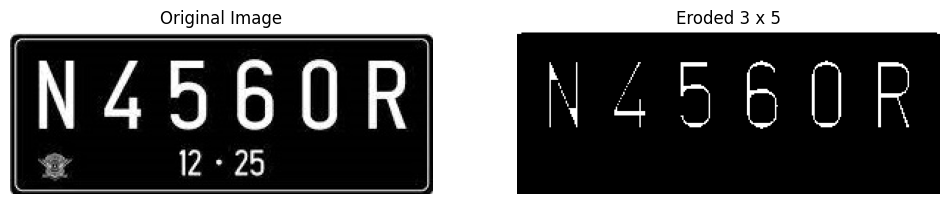

In [24]:
eroded_image_3x3 = cv2.erode(image, rectangle_SED_3x5)

showCompImage(ori,eroded_image_3x3,"Eroded 3 x 5")

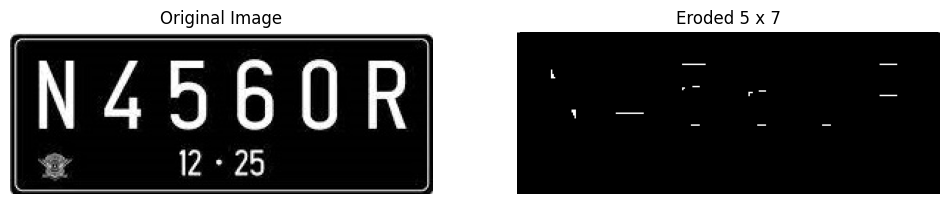

In [25]:
eroded_image_5x7 = cv2.erode(image, rectangle_SED_5x7)

showCompImage(ori,eroded_image_5x7,"Eroded 5 x 7")

In [26]:
# Buat SED (Structuring Element) berbentuk Line Vertikal 3
line_SED_3 = np.ones((3, 1), dtype=np.uint8)

# Buat SED (Structuring Element) berbentuk Line Vertikal 5
line_SED_5 = np.ones((5, 1), dtype=np.uint8)

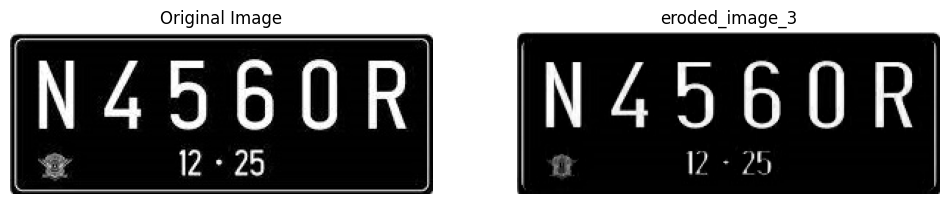

In [27]:
# Lakukan operasi erosi dengan SED Line Vertikal 3
eroded_image_3 = cv2.erode(ori, line_SED_3)

showCompImage(ori,eroded_image_3,"eroded_image_3")

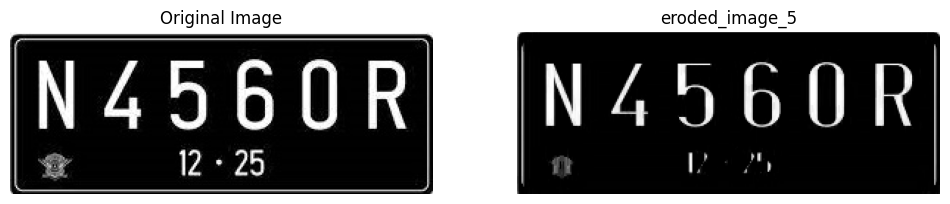

In [28]:
# Lakukan operasi erosi dengan SED Line Vertikal 3
eroded_image_5 = cv2.erode(ori, line_SED_5)

showCompImage(ori,eroded_image_5,"eroded_image_5")

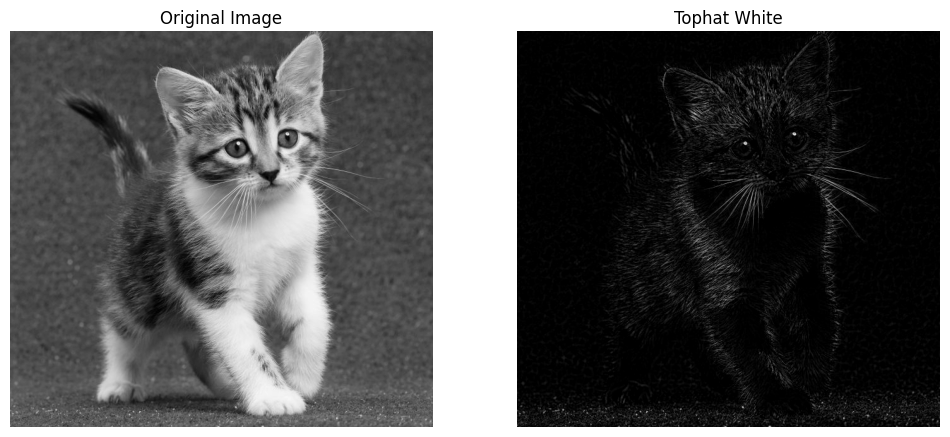

In [29]:
cat = cv2.imread('/content/drive/MyDrive/PCVK/cat.jpg',cv2.IMREAD_GRAYSCALE)

# Buat SED (Structuring Element) sesuai kebutuhan (misalnya, buat Rectangle 5x5)
rect_SED = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Lakukan operasi Top Hat Putih
tophat_white = cv2.morphologyEx(cat, cv2.MORPH_TOPHAT, rect_SED)

showCompImage(cat,tophat_white,"Tophat White")

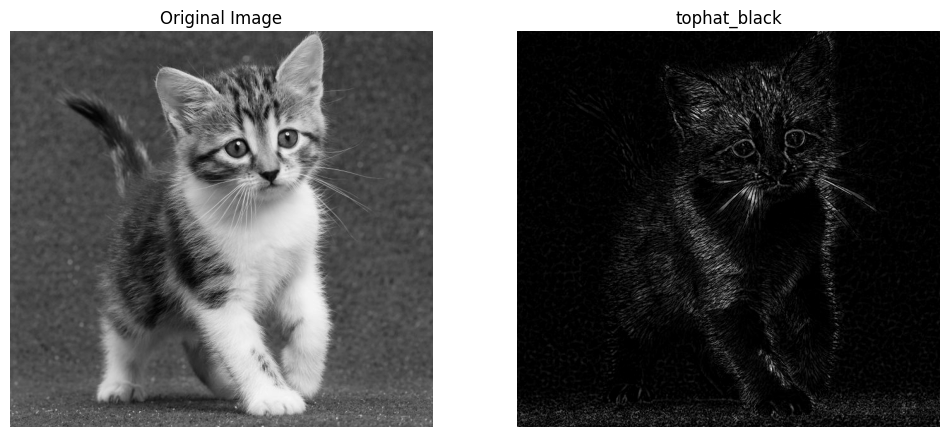

In [30]:
# Lakukan operasi Top Hat Black
tophat_black = cv2.morphologyEx(cat, cv2.MORPH_BLACKHAT, rect_SED)

showCompImage(cat,tophat_black,"tophat_black")

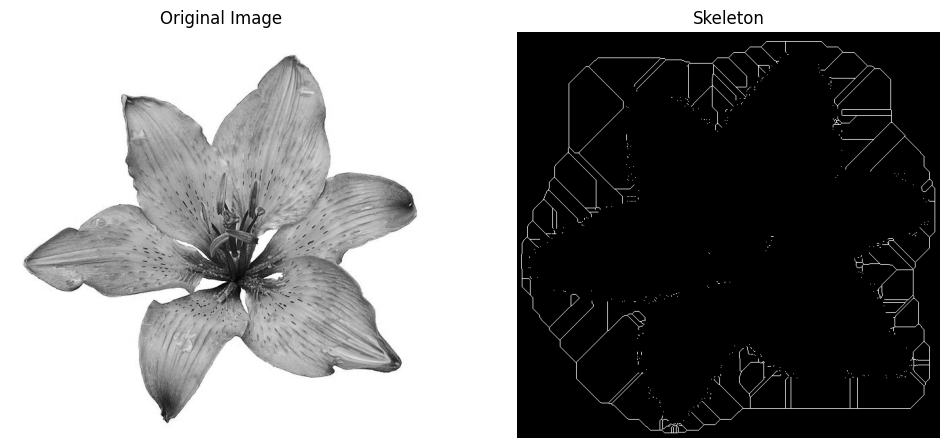

In [31]:

from skimage.morphology import skeletonize
import skimage.io as io

# Baca citra biner
image = io.imread('/content/drive/MyDrive/PCVK/lily.jpg', as_gray=True)

# Operasi Skeletonization
skeleton = skeletonize(image)

# Tampilkan hasil Skeletonization
showCompImage(image,skeleton,"Skeleton")


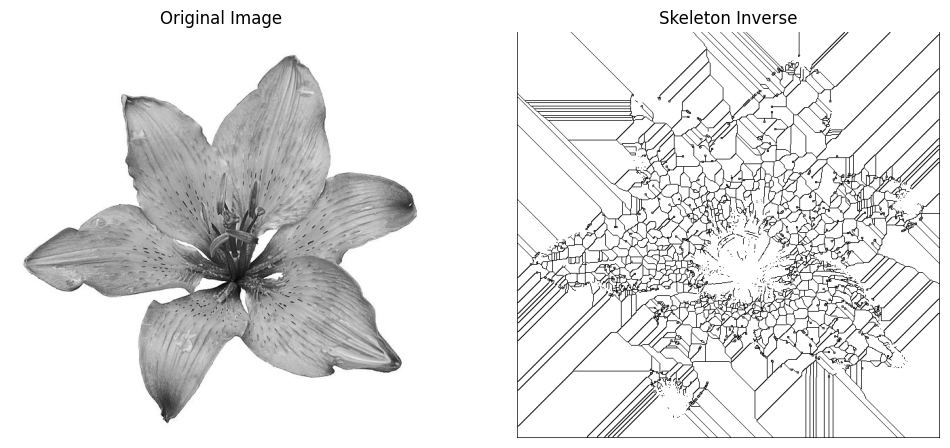

In [32]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/lily.jpg', cv2.IMREAD_GRAYSCALE)

# Konversi citra menjadi citra biner dengan latar belakang hitam dan objek putih
binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]

# Terapkan operasi Skeletonization ke citra biner
skeleton = cv2.ximgproc.thinning(binary_image)

# Inversi warna latar belakang pada skeleton
skeleton_inverse = cv2.bitwise_not(skeleton)

# Tampilkan hasil Skeletonization
showCompImage(image,skeleton_inverse,"Skeleton Inverse")


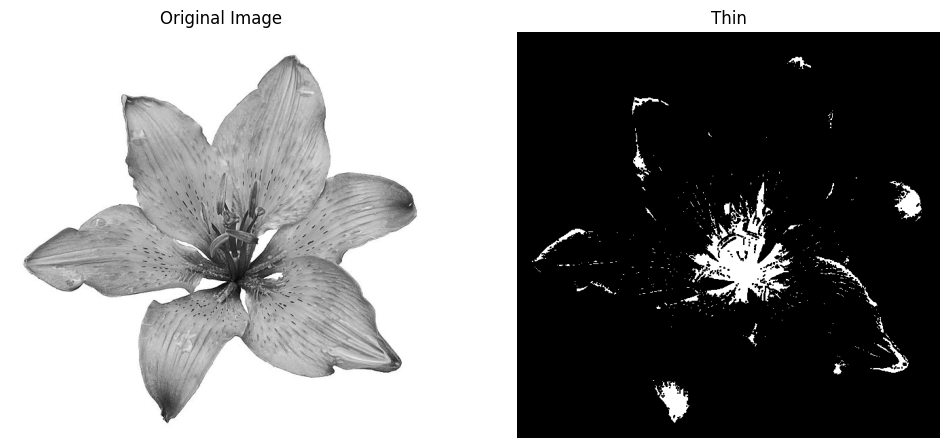

In [33]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/lily.jpg', cv2.IMREAD_GRAYSCALE)
# Konversi citra biner dengan objek putih dan latar belakang hitam
binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]

# Buat SED (Structuring Element) sesuai kebutuhan (misalnya, buat Rectangle 3x3)
rect_SED = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

# Lakukan operasi Thickening (dilasi) pada citra biner
thickened_image = cv2.dilate(binary_image, rect_SED)

# Inversi warna latar belakang pada skeleton
skeleton_inverse = cv2.bitwise_not(thickened_image)

# Tampilkan hasil Thickening
showCompImage(image,skeleton_inverse,"Thin")

## Tugas Praktikum

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.


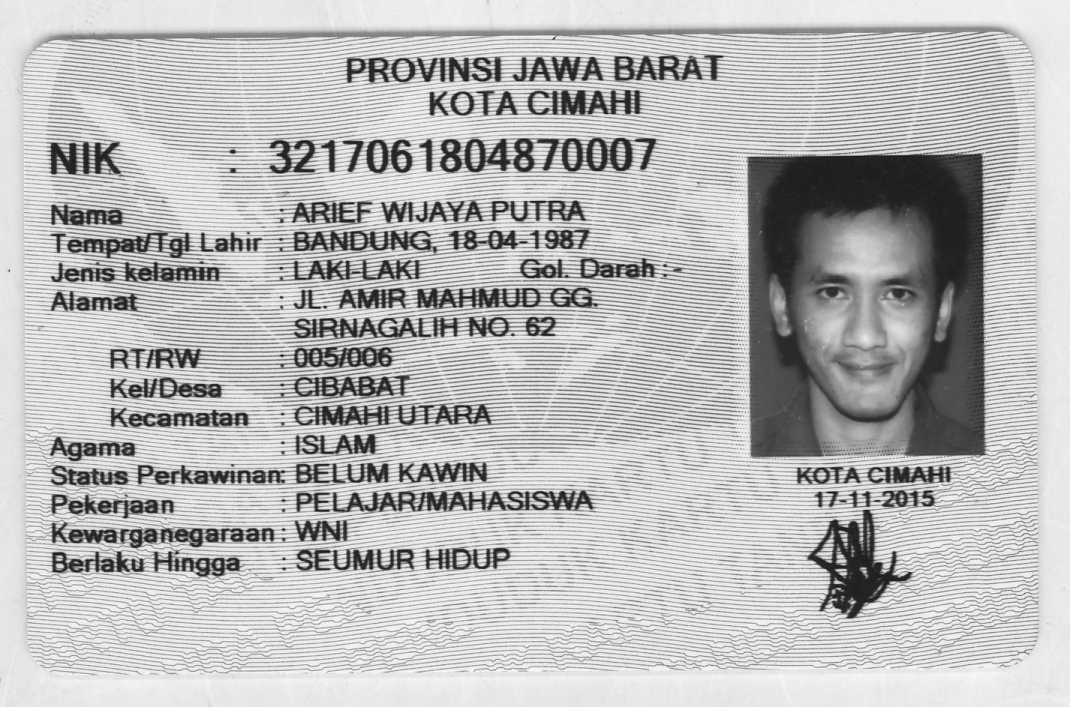

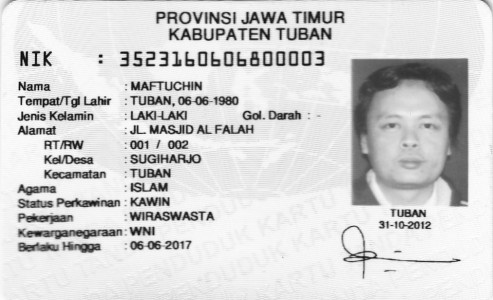

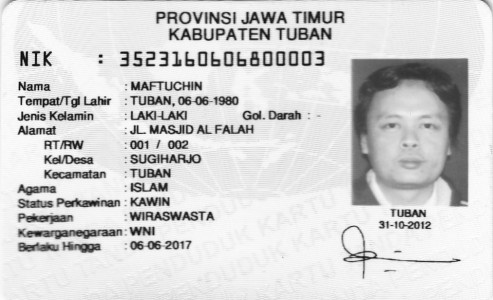

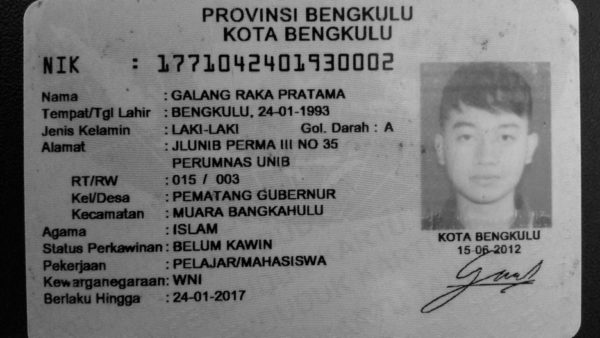

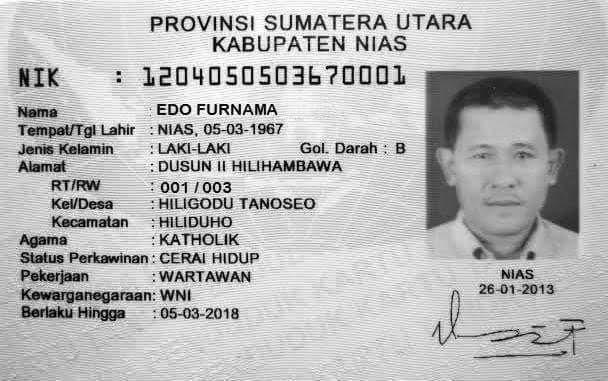

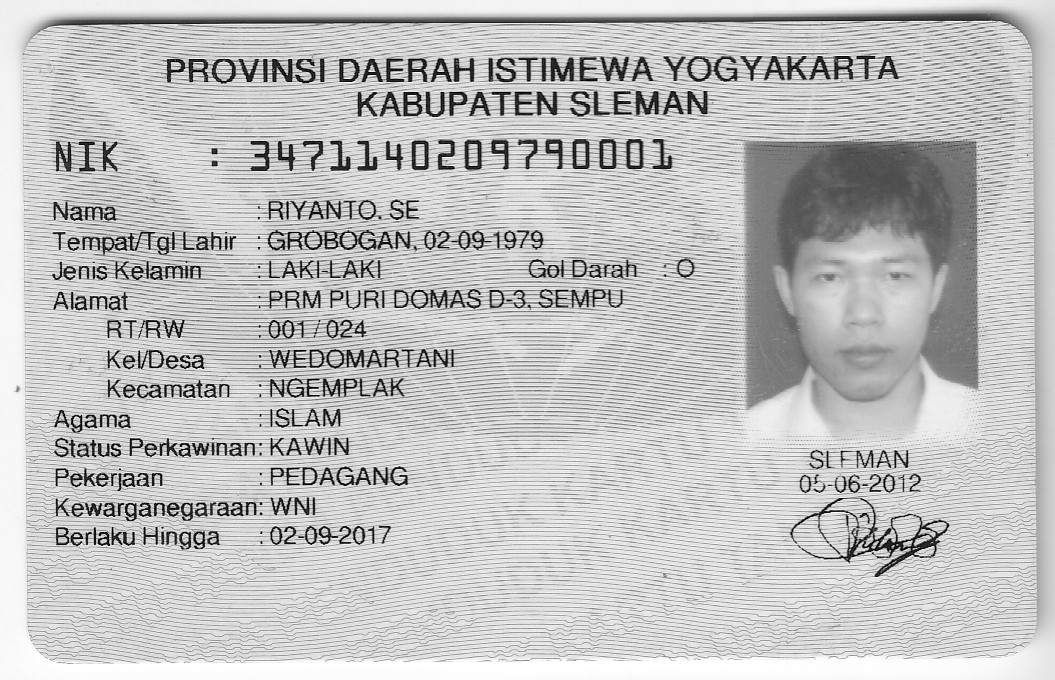

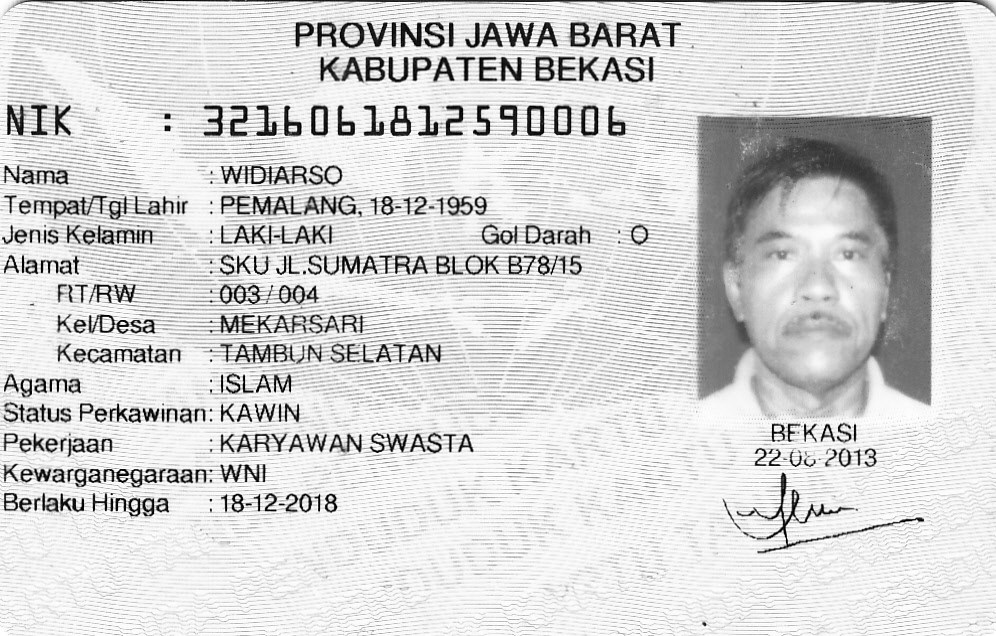

In [37]:

import glob
cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/dummy_ktp_07/*.png'):
  n= cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  cv_img.append(n)
  cv2_imshow(n)


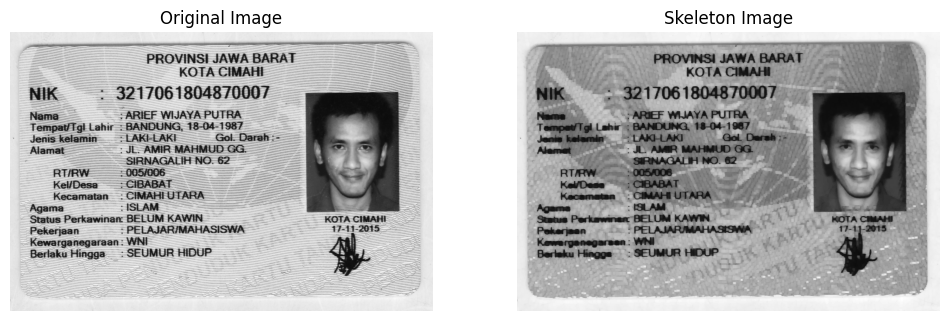

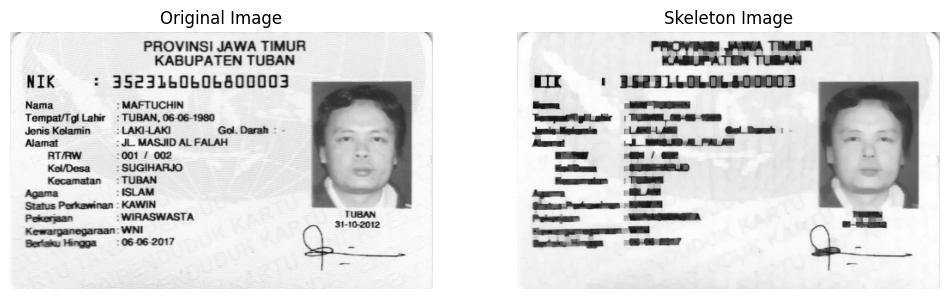

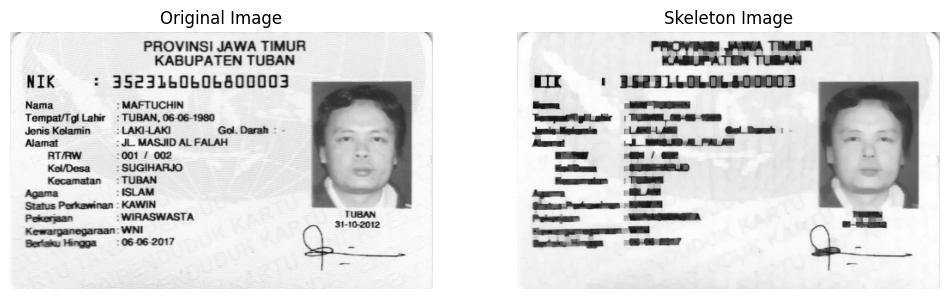

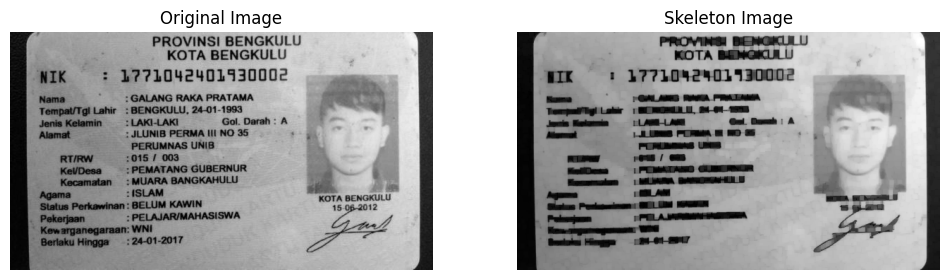

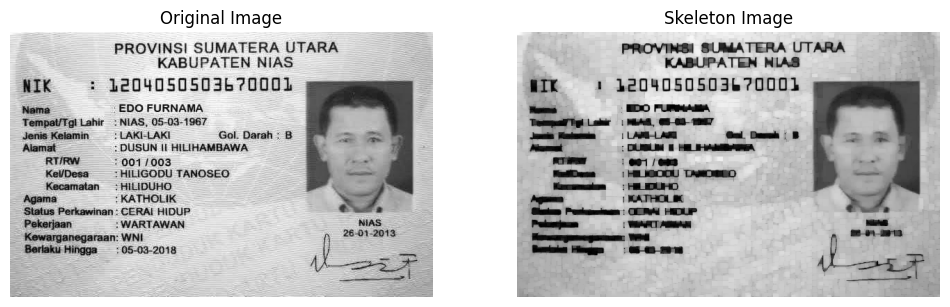

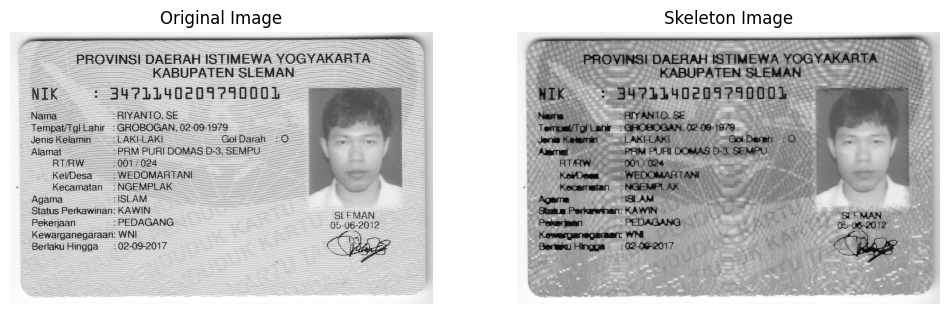

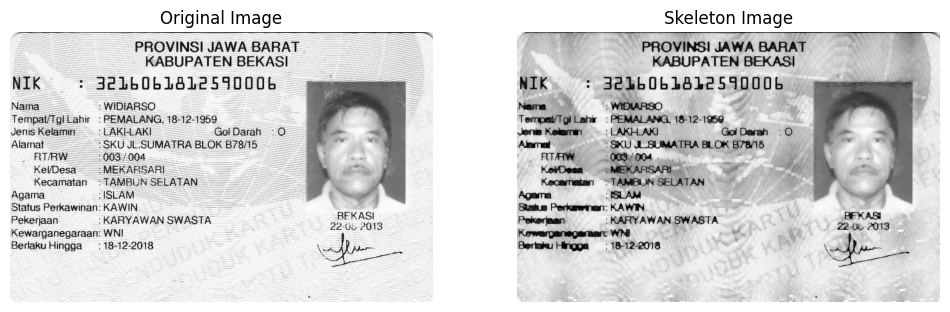

In [42]:
for img in cv_img:
  square_SED = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

  # Lakukan operasi erosi
  eroded = cv2.erode(img, square_SED)

  # Lakukan operasi dilasi pada hasil erosi
  opened_image = cv2.dilate(eroded, square_SED)

  showCompImage(img,opened_image,f"Skeleton Image")